<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Ames Housing Sale Price Prediction Model

> Authors: Djuwita Carney

---

## Objective
To make a prediction of housing price in Ames, Iowa as a function of many aspects of housing conditions

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score

%matplotlib inline

In [2]:
cd \Users\carne\Documents\Djuwita_DSI\Submissions\project_2

C:\Users\carne\Documents\Djuwita_DSI\Submissions\project_2


## Read Data
The `train` dataset consists of comprehensive housing data in Ames Iowa 

In [3]:
cd/djuwita/submissions/Project_2

[WinError 3] The system cannot find the path specified: '/djuwita/submissions/Project_2'
C:\Users\carne\Documents\Djuwita_DSI\Submissions\project_2


In [4]:
# Read in the dummy_train data in the data folder in this repository. dummy_train data is the clean train data with dummy columns for the qualitative variables
dummy_train = pd.read_csv('./datasets/dummy_train.csv')

In [5]:
# Read in the clean_test file. This is the file with clean test data data with dummy columns for the qualitative variables.
test = pd.read_csv('./datasets/clean_test.csv')

# Prepare regression parameters

In [6]:
# Identify common variables between Train and Test data for fitting to be possible

dummy_train_cols = dummy_train.columns
test_cols = test.columns

common_cols = dummy_train_cols.intersection(test_cols)
common_cols

Index(['PID', 'Lot Area', 'Overall Qual', 'Year Built', 'Year Remod/Add',
       'BsmtFin SF 1', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
       '2nd Flr SF',
       ...
       'Paved Drive_Y', 'Sale Type_COD', 'Sale Type_CWD', 'Sale Type_Con',
       'Sale Type_ConLD', 'Sale Type_ConLI', 'Sale Type_ConLw',
       'Sale Type_New', 'Sale Type_Oth', 'Sale Type_WD '],
      dtype='object', length=201)

In [7]:
test = test.loc[:, test.columns.isin(list(common_cols))]

In [8]:
features = common_cols
X_train = dummy_train[features]
y_train = dummy_train['SalePrice']
X_test = test

In [9]:
lr = LinearRegression()

In [10]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
y_test = lr.predict(X_test)
y_pred.max()

515854.04711768095

In [11]:
## Delete one out lier

for i in range(len(y_pred)):
    if y_pred[i] == y_pred.max():
        print(i, y_train[i], y_pred[i])
        y_train.drop(i, inplace = True)  
        X_train.drop(i, inplace = True)
    else:
        pass

1884 183850 515854.04711768095


C:\Users\carne\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [12]:
lr = LinearRegression()

In [13]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)
y_test = lr.predict(X_test)


In [14]:
## Lasso and Ridge

In [15]:
# Instantiate.
ss = StandardScaler()

# Fit.
X_train_sc = ss.fit_transform(X_train)

# Fit.
X_test_sc = ss.fit_transform(X_test)

In [16]:
lasso = LassoCV(n_alphas=100)

In [17]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

## Cross validation
---

Use `cross_val_score` to evaluate all models.

In [18]:
lasso_scores = cross_val_score(lasso, X_train_sc, y_train, cv=3)
lasso_scores.mean()

C:\Users\carne\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\carne\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\carne\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.8733199809393514

In [19]:
ridge_scores = cross_val_score(ridge, X_train_sc, y_train, cv=3)
ridge_scores.mean()

0.8667711083528618

## Ridge Model Fitting and Evaluation
---

In [20]:
ridge.fit(X_train_sc, y_train)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=False)

In [21]:
ridge.score(X_train_sc, y_train)

0.9146379118966697

In [22]:
ridge.score(X_test_sc, y_test)

0.996122229651732

In [23]:
pred = ridge.predict(X_test_sc)

In [24]:
r2_score(y_test, pred)

0.996122229651732

In [25]:
residuals_ridge = y_test - pred

## Lasso Model Fitting and Evaluation

In [26]:
lasso.fit(X_train_sc, y_train)

C:\Users\carne\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [27]:
lasso.score(X_train_sc, y_train)

0.9051700939850267

In [28]:
lasso.score(X_test_sc, y_test)

0.9874825840400357

In [29]:
pred = lasso.predict(X_test_sc)

In [30]:
r2_score(y_test, pred)

0.9874825840400356

In [31]:
residuals_lasso = y_test - pred

Text(0, 0.5, 'Ridge_residuals')

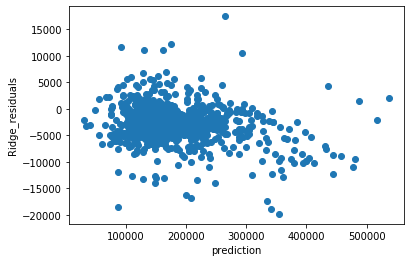

In [32]:
plt.scatter(pred, residuals_ridge)
plt.xlabel('prediction')
plt.ylabel('Ridge_residuals')

In [33]:
residuals_lasso = y_test - pred

Text(0, 0.5, 'Lasso_residuals')

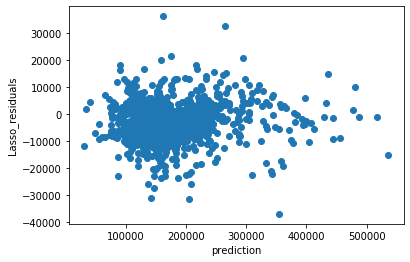

In [34]:
plt.scatter(pred, residuals_lasso)
plt.xlabel('prediction')
plt.ylabel('Lasso_residuals')

# Lasso scores for  test is higher than train score, indicating an under predicting model. Residuals lie around zero, except for a few outliers. The number of outliers is less than those of Ridge, how ever the residuals for those outliers are larger

## Cross validation
---

Use `cross_val_score` to evaluate all models.

In [35]:
lr_scores = cross_val_score(lr, X_train, y_train, cv=3)
lr_scores.mean()

0.8646346714328798

In [36]:
lasso_scores = cross_val_score(lasso, X_train_sc, y_train, cv=3)
lasso_scores.mean()

C:\Users\carne\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\carne\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\carne\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.8733199809393514

In [37]:
ridge_scores = cross_val_score(ridge, X_train_sc, y_train, cv=3)
ridge_scores.mean()

0.8667711083528618

In [38]:
# Read in test file. to get the Id.
test_org = pd.read_csv('./datasets/test.csv')

In [39]:
id_number = test_org['Id']
id_number = pd.DataFrame(id_number)
id_number.dropna()
id_number.shape

(879, 1)

In [40]:
# Save prediction to csv file for submission
pred = pd.DataFrame(pred)
frame = [id_number, pred]
result = pd.concat(frame, axis = 1)
result.columns = ['Id','SalePrice']

result.to_csv(r'\Users\carne\Documents\Djuwita_DSI\Submissions\project_2\datasets\result2.csv', index = False)

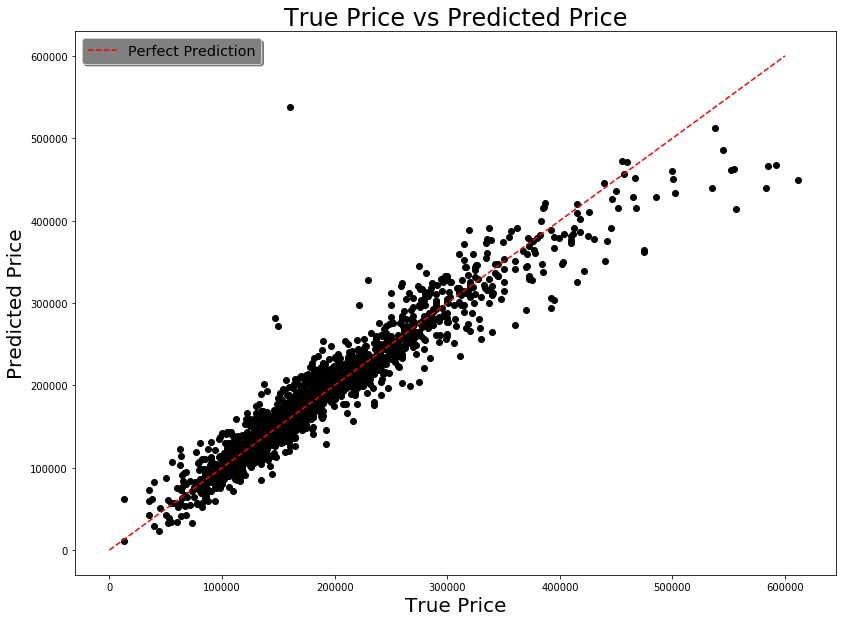

In [41]:
# A:

# Plot between true price and the predicted price
#
y0 = [0,600_000] # this line represents an ideal prediction line
y1 = [0, 600_000]

f = plt.figure(figsize=(30,10))

ax = f.add_subplot(121)
ax.plot(y0, y1, 'k--', label='Perfect Prediction', color = 'red')
ax.scatter(y_train,y_pred,
            color = 'black')
legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')

plt.xlabel('True Price', fontsize = 20)
plt.ylabel('Predicted Price', fontsize = 20)

# Put a background color on the legend.
legend.get_frame().set_facecolor('grey')

# Create a title.
plt.title('True Price vs Predicted Price', fontsize = 24);

## Perform OSL

In [42]:
# This will produce a summary table where we can see how each prediction variable affects he SalePrice

import statsmodels.api as sm
lr2 = sm.OLS(y_train, X_train).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     111.8
Date:                Fri, 04 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:21:11   Log-Likelihood:                -23489.
No. Observations:                2049   AIC:                         4.734e+04
Df Residuals:                    1867   BIC:                         4.837e+04
Df Model:                         181                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
PID                   4.052e-06   8.39e-06      0.483      0.629   -1.24e-05    2.05e-05
Lot Area                 0.4623      0.124      3.723      0.000       0.219       0.706
Overall Qual          8322.6192    838.098      9.930      0.000    6678.912    9966.326
Year Built              82.6012     61.374      1.346      0.179     -37.767     202.969
Year Remod/Add         175.3168     45.482      3.855      0.000      86.115     264.519
BsmtFin SF 1             2.7126      3.979      0.682      0.495      -5.091      10.516
Bsmt Unf SF             -4.2612      4.153     -1.026      0.305     -12.407       3.885
Total Bsmt SF           10.5984      4.975      2.130      0.033       0.842      20.355
1st Flr SF              14.8489     13.278      1.118      0.264     -11.193      40.891
2nd Flr SF              17.1750     12.561      1.367      0.172      -7.459      41.810
Gr Liv Area             32.6575     13.020      2.508      0.012       7.123      58.192
Bsmt Full Bath        5411.8743   1553.669      3.483      0.001    2364.763    8458.986
Full Bath             4791.7565   1807.013      2.652      0.008    1247.779    8335.735
Half Bath             3449.4462   1718.101      2.008      0.045      79.846    6819.046
Bedroom AbvGr        -3236.9260   1112.557     -2.909      0.004   -5418.913   -1054.939
Kitchen AbvGr        -1.339e+04   5081.979     -2.635      0.008   -2.34e+04   -3422.825
TotRms AbvGrd         1600.5107    786.041      2.036      0.042      58.899    3142.123
Fireplaces            4318.6819   1164.483      3.709      0.000    2034.856    6602.508
Garage Yr Blt          -10.3933     42.214     -0.246      0.806     -93.186      72.399
Garage Cars           6446.7428   1894.833      3.402      0.001    2730.530    1.02e+04
Garage Area              5.0954      6.738      0.756      0.450      -8.120      18.311
Wood Deck SF            15.5675      4.933      3.156      0.002       5.892      25.243
Open Porch SF            0.3517      9.643      0.036      0.971     -18.560      19.264
Enclosed Porch           6.7388     10.788      0.625      0.532     -14.420      27.897
Screen Porch            77.1549     10.298      7.492      0.000      56.958      97.352
Lot Shape_IR1        -1.692e+04   8684.346     -1.948      0.052   -3.39e+04     116.661
Lot Shape_IR2        -1.203e+04   9159.929     -1.313      0.189      -3e+04    5935.980
Lot Shape_IR3        -7.465e+04   1.13e+04     -6.617      0.000   -9.68e+04   -5.25e+04
Lot Shape_Reg         -1.66e+04   8701.196     -1.908      0.057   -3.37e+04     463.556
Land Contour_Bnk     -3.823e+04   8872.336     -4.309      0.000   -5.56e+04   -2.08e+04
Land Contour_HLS     -2.233e+04   9146.254     -2.441      0.015   -4.03e+04   -4391.439
Land Contour_Low     -2.955e+04   9320.062     -3.171    

In [43]:
# Read in test file. to get the Id.
test_org = pd.read_csv('./datasets/test.csv')

In [44]:
id_number = test_org['Id']
id_number = pd.DataFrame(id_number)
id_number.dropna()
id_number.shape

(879, 1)

In [45]:
# Save prediction to csv file for submission
pred = pd.DataFrame(pred)
frame = [id_number, pred]
result = pd.concat(frame, axis = 1)
result.columns = ['Id','SalePrice']

result.to_csv(r'\Users\carne\Documents\Djuwita_DSI\Submissions\project_2\datasets\result2.csv', index = False)

## This tunning in process improved the model